In [15]:
import pandas as pd
import datetime
import os
import yfinance as yf
import seaborn as sns

In [2]:
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = table[0]
list_tickers = list(df.Symbol)

In [3]:
list_tickers[:4]

['MMM', 'ABT', 'ABBV', 'ABMD']

In [4]:
if not os.path.exists('stock_dfs'):
    os.makedirs('stock_dfs')

In [5]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime.now()

for ticker in list_tickers:
# just in case your connection breaks, we'd like to save our progress!
    if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
        if "." in ticker:
            ticker = ticker.replace(".","-")
        df = yf.download(ticker, start, end)
        df.reset_index(inplace=True)
        df.set_index("Date", inplace=True)
#         df = df.drop("Symbol", axis=1)
        df.to_csv('stock_dfs/{}.csv'.format(ticker))
    else:
        print('Already have {}'.format(ticker))

Already have MMM
Already have ABT
Already have ABBV
Already have ABMD
Already have ACN
Already have ATVI
Already have ADBE
Already have AMD
Already have AAP
Already have AES
Already have AFL
Already have A
Already have APD
Already have AKAM
Already have ALK
Already have ALB
Already have ARE
Already have ALXN
Already have ALGN
Already have ALLE
Already have LNT
Already have ALL
Already have GOOGL
Already have GOOG
Already have MO
Already have AMZN
Already have AMCR
Already have AEE
Already have AAL
Already have AEP
Already have AXP
Already have AIG
Already have AMT
Already have AWK
Already have AMP
Already have ABC
Already have AME
Already have AMGN
Already have APH
Already have ADI
Already have ANSS
Already have ANTM
Already have AON
Already have AOS
Already have APA
Already have AIV
Already have AAPL
Already have AMAT
Already have APTV
Already have ADM
Already have ANET
Already have AJG
Already have AIZ
Already have T
Already have ATO
Already have ADSK
Already have ADP
Already have AZ

In [16]:
main_df = pd.DataFrame()
for count,ticker in enumerate(list_tickers):
    if "." in ticker:
        ticker = ticker.replace(".","-")
    df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
    df.set_index('Date', inplace=True)

    df.rename(columns={'Adj Close':ticker}, inplace=True)
    df.drop(['Open','High','Low','Close','Volume'],1,inplace=True)

    if main_df.empty:
        main_df = df
    else:
        main_df = main_df.join(df, how='outer')
        
main_df.to_csv('data/SP500_HistoTimeSeries.csv')

In [17]:
main_df.tail()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-20,172.89,110.89,100.84,268.21,243.44,76.81,462.92,84.64,144.33,20.42,...,95.29,69.31,21.91,132.38,94.38,104.52,354.99,145.94,38.28,166.20
2020-11-23,174.14,109.27,102.18,266.43,246.20,75.92,460.61,85.31,145.56,20.46,...,95.48,68.36,22.59,133.30,94.70,104.53,362.69,146.24,39.56,164.34
2020-11-24,177.08,107.61,103.96,265.67,250.00,75.23,462.70,85.07,149.83,21.15,...,102.76,68.14,23.55,133.22,97.52,107.19,373.47,151.08,41.86,161.06
2020-11-25,177.12,106.41,104.20,263.82,249.33,76.51,470.08,86.71,149.40,20.98,...,100.40,68.11,23.38,135.56,96.69,106.61,372.73,149.68,40.95,160.19
2020-11-27,176.89,107.62,104.89,271.90,250.12,78.14,477.03,87.19,149.93,21.04,...,101.22,67.62,23.22,137.49,97.14,107.18,377.00,150.02,39.46,161.47


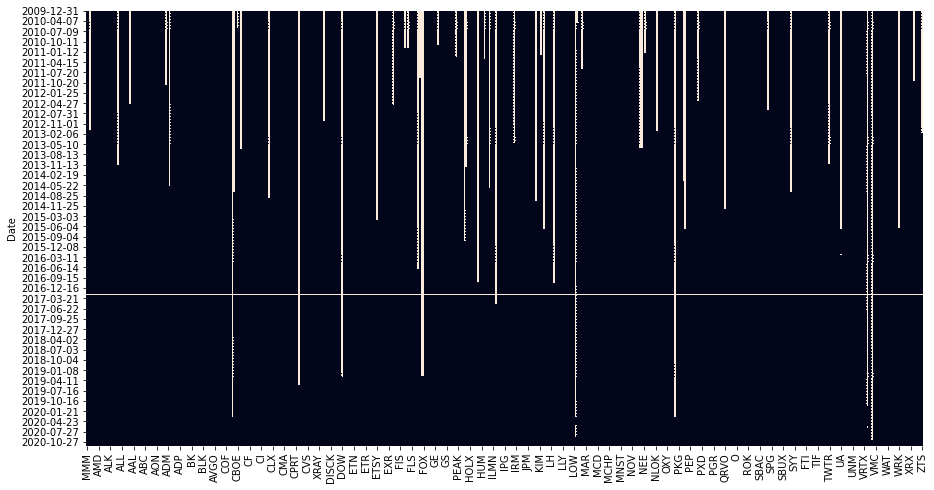

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(main_df.isnull(), cbar=False)